In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Other utilities
import warnings
warnings.filterwarnings('ignore')  # To suppress unnecessary warnings

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Assignment/Datasets/trip.csv')
df.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Payment Type
0,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,3.25,0.00,0.0,35.0,38.75,Credit Card
1,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,12.00,0.00,0.0,0.0,12.00,Cash
2,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,16.75,4.45,0.0,5.0,26.70,Credit Card
3,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,34.75,7.85,0.0,4.0,47.10,Credit Card
4,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,18.51,4.31,0.0,0.0,22.82,Mobile


In [ ]:
df.shape

(50000, 10)

In [ ]:
df.isna().sum()

,0
Trip Start Timestamp,0
Trip End Timestamp,0
Trip Seconds,5
Trip Miles,0
Fare,145
Tips,145
Tolls,145
Extras,145
Trip Total,145
Payment Type,0


In [ ]:
df.columns

Index(['Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total',
       'Payment Type'],
      dtype='object')

In [ ]:
columns_to_fill = ['Trip Seconds', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total']
df[columns_to_fill] = df[columns_to_fill].apply(lambda x: x.fillna(x.median()))
df.isna().sum()

,0
Trip Start Timestamp,0
Trip End Timestamp,0
Trip Seconds,0
Trip Miles,0
Fare,0
Tips,0
Tolls,0
Extras,0
Trip Total,0
Payment Type,0


In [ ]:
df.duplicated().sum()

392

In [ ]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Payment Type
0,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,3.25,0.00,0.0,35.0,38.75,Credit Card
1,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,12.00,0.00,0.0,0.0,12.00,Cash
2,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,16.75,4.45,0.0,5.0,26.70,Credit Card
3,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,34.75,7.85,0.0,4.0,47.10,Credit Card
4,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,18.51,4.31,0.0,0.0,22.82,Mobile


In [ ]:
df.describe().round(3)

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total
count,49608.000,49608.000,49608.000,49608.000,49608.000,49608.000,49608.000
mean,1168.967,6.312,21.221,2.765,0.107,2.054,26.337
std,1508.316,6.881,17.222,4.095,19.959,21.440,46.051
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,456.000,0.930,7.750,0.000,0.000,0.000,9.750
50%,877.000,2.780,14.350,1.000,0.000,0.000,17.250
75%,1620.000,11.430,33.000,4.000,0.000,1.500,38.750
max,77579.000,121.370,523.000,150.000,4444.440,4445.440,8901.880


In [ ]:
df.dtypes

,0
Trip Start Timestamp,object
Trip End Timestamp,object
Trip Seconds,float64
Trip Miles,float64
Fare,float64
Tips,float64
Tolls,float64
Extras,float64
Trip Total,float64
Payment Type,object


In [ ]:
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

print(df.dtypes)

Trip Start Timestamp    datetime64[ns]
Trip End Timestamp      datetime64[ns]
Trip Seconds                   float64
Trip Miles                     float64
Fare                           float64
Tips                           float64
Tolls                          float64
Extras                         float64
Trip Total                     float64
Payment Type                    object
dtype: object


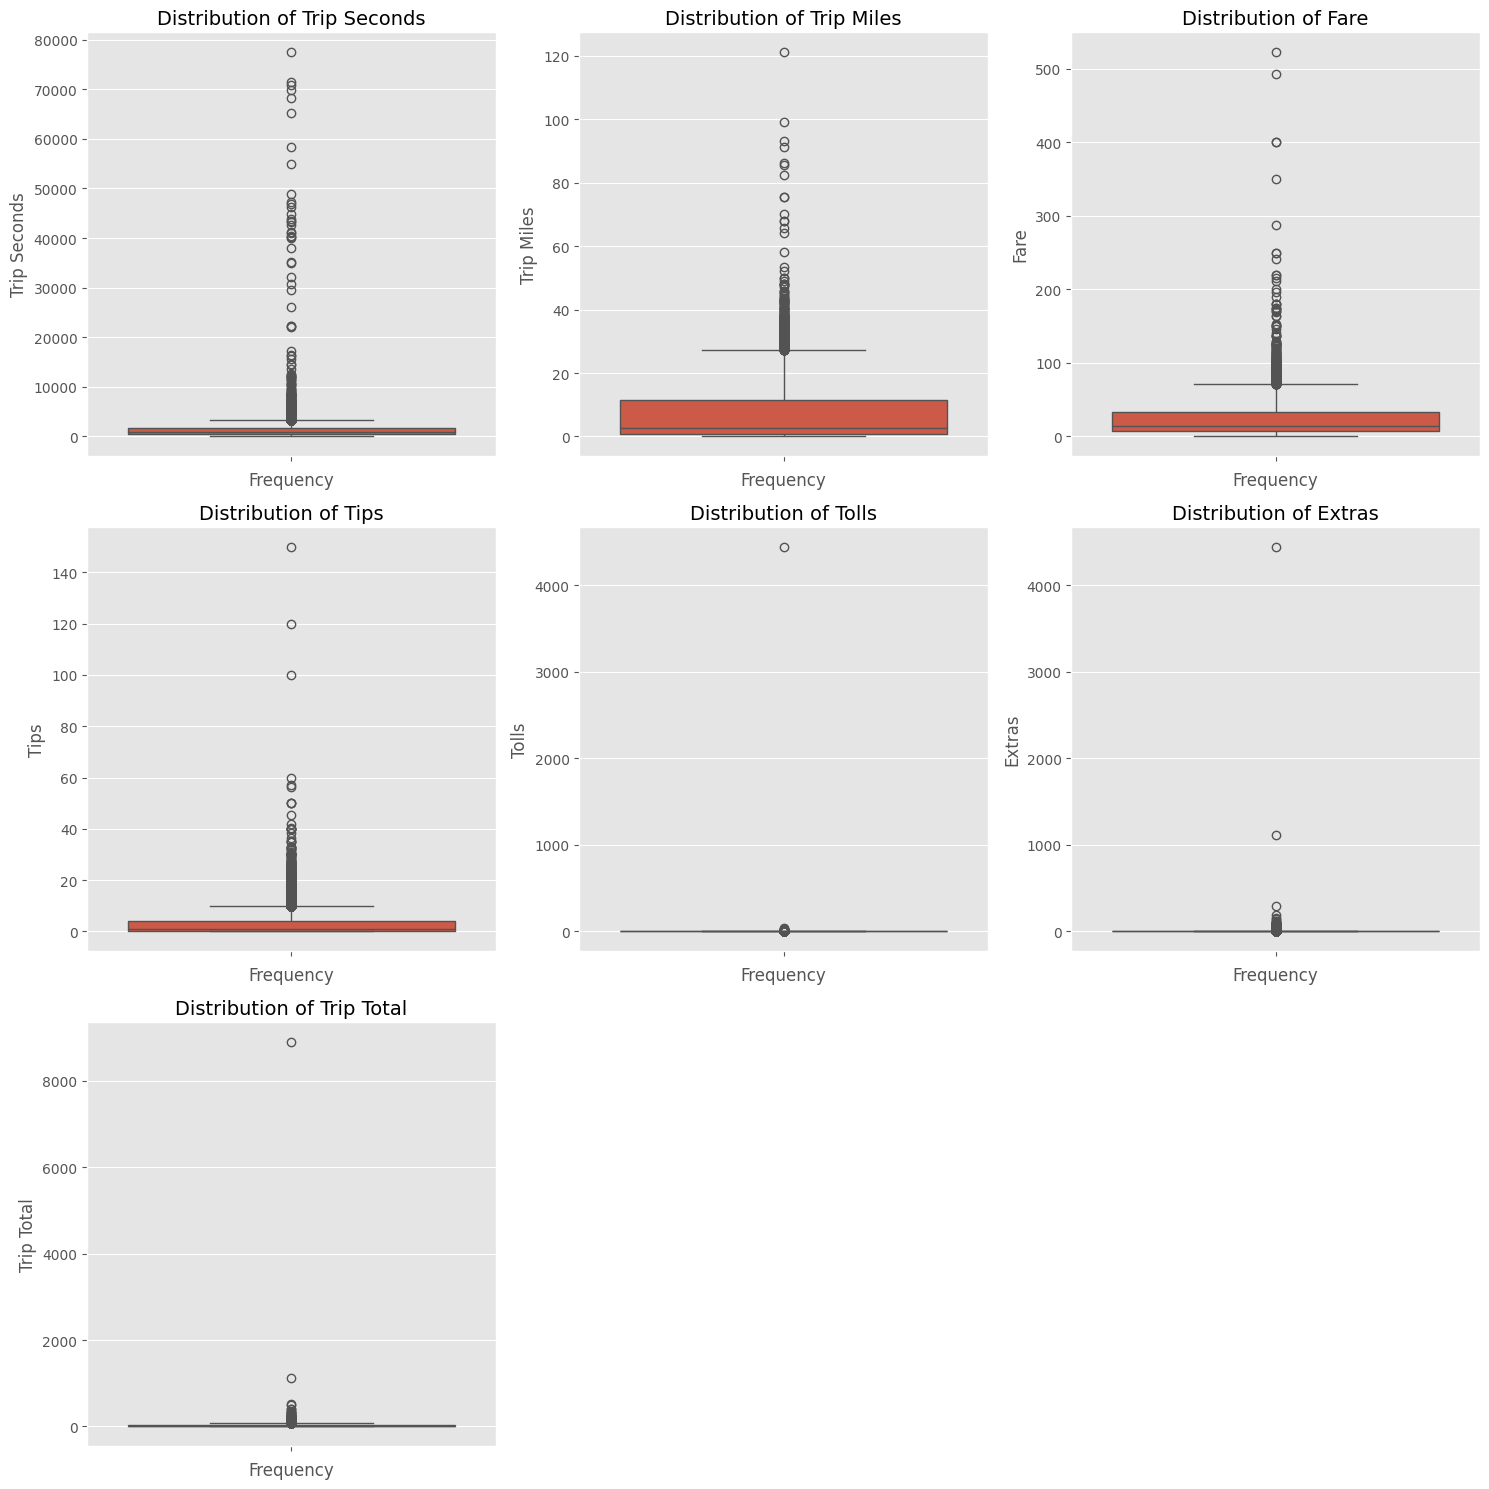

In [ ]:
numeric_columns = df.select_dtypes(np.number).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xlabel('Frequency', fontsize=12)

for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

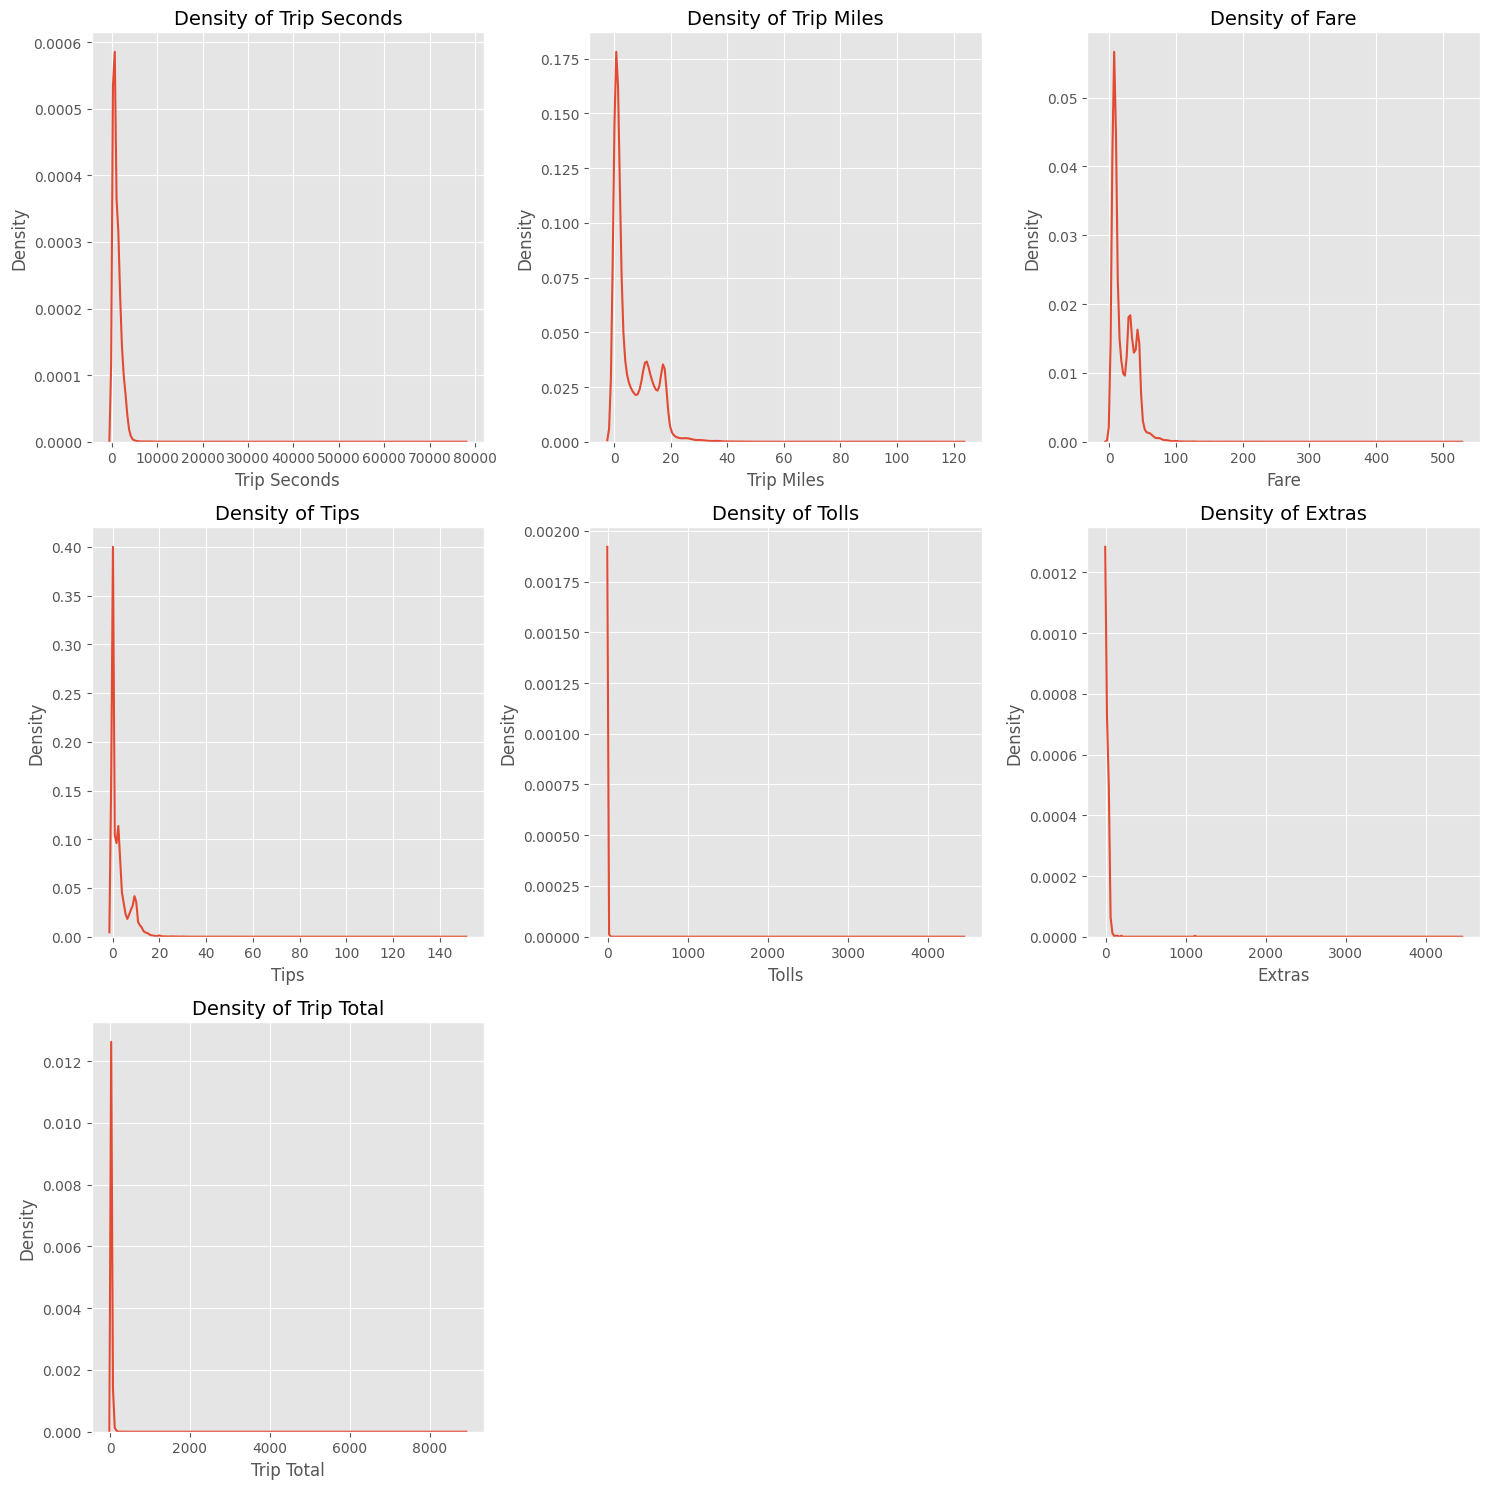

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Density of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
numeric_data = df.select_dtypes(np.number)
numeric_data.describe().round(3)

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total
count,49608.000,49608.000,49608.000,49608.000,49608.000,49608.000,49608.000
mean,1168.967,6.312,21.221,2.765,0.107,2.054,26.337
std,1508.316,6.881,17.222,4.095,19.959,21.440,46.051
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,456.000,0.930,7.750,0.000,0.000,0.000,9.750
50%,877.000,2.780,14.350,1.000,0.000,0.000,17.250
75%,1620.000,11.430,33.000,4.000,0.000,1.500,38.750
max,77579.000,121.370,523.000,150.000,4444.440,4445.440,8901.880


In [ ]:
def quantile_data(data, column):
  print(f"""For column: {column}:\n
  75th Quantile: {data[column].quantile(0.75)},
  90th Quantile: {data[column].quantile(0.90)},
  95th Quantile: {data[column].quantile(0.95)},
  99th Quantile: {data[column].quantile(0.99)},
  99.5th Quantile: {data[column].quantile(0.995)},
  Max value: {data[column].max()}\n""")

In [ ]:
for col in numeric_data.columns:
  quantile_data(data = numeric_data, column = col)

For column: Trip Seconds:

  75th Quantile: 1620.0,
  90th Quantile: 2423.0,
  95th Quantile: 2944.649999999994,
  99th Quantile: 3871.720000000001,
  99.5th Quantile: 4442.8949999999895,
  Max value: 77579.0

For column: Trip Miles:

  75th Quantile: 11.43,
  90th Quantile: 16.9,
  95th Quantile: 18.02,
  99th Quantile: 25.479300000000002,
  99.5th Quantile: 30.18,
  Max value: 121.37

For column: Fare:

  75th Quantile: 33.0,
  90th Quantile: 43.5,
  95th Quantile: 46.5,
  99th Quantile: 69.75,
  99.5th Quantile: 80.0,
  Max value: 523.0

For column: Tips:

  75th Quantile: 4.0,
  90th Quantile: 9.2,
  95th Quantile: 10.3,
  99th Quantile: 15.0,
  99.5th Quantile: 18.30789999999979,
  Max value: 150.0

For column: Tolls:

  75th Quantile: 0.0,
  90th Quantile: 0.0,
  95th Quantile: 0.0,
  99th Quantile: 0.0,
  99.5th Quantile: 0.03894999999989523,
  Max value: 4444.44

For column: Extras:

  75th Quantile: 1.5,
  90th Quantile: 4.0,
  95th Quantile: 6.0,
  99th Quantile: 32.0,
  99.5

In [ ]:
for col in numeric_data.columns:
  df = df[df[col] <= df[col].quantile(0.996)]

numeric_data = df.select_dtypes(np.number)
numeric_data.describe().round(3)

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total
count,48252.000,48252.000,48252.000,48252.000,48252.000,48252.000,48252.000
mean,1104.011,5.978,20.166,2.567,0.000,1.396,24.318
std,854.472,6.242,14.692,3.510,0.017,3.471,18.562
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,452.000,0.920,7.750,0.000,0.000,0.000,9.600
50%,850.000,2.640,13.990,1.000,0.000,0.000,16.500
75%,1569.000,11.150,32.000,3.700,0.000,1.000,35.700
max,4712.000,30.140,71.500,17.400,1.000,36.000,85.500


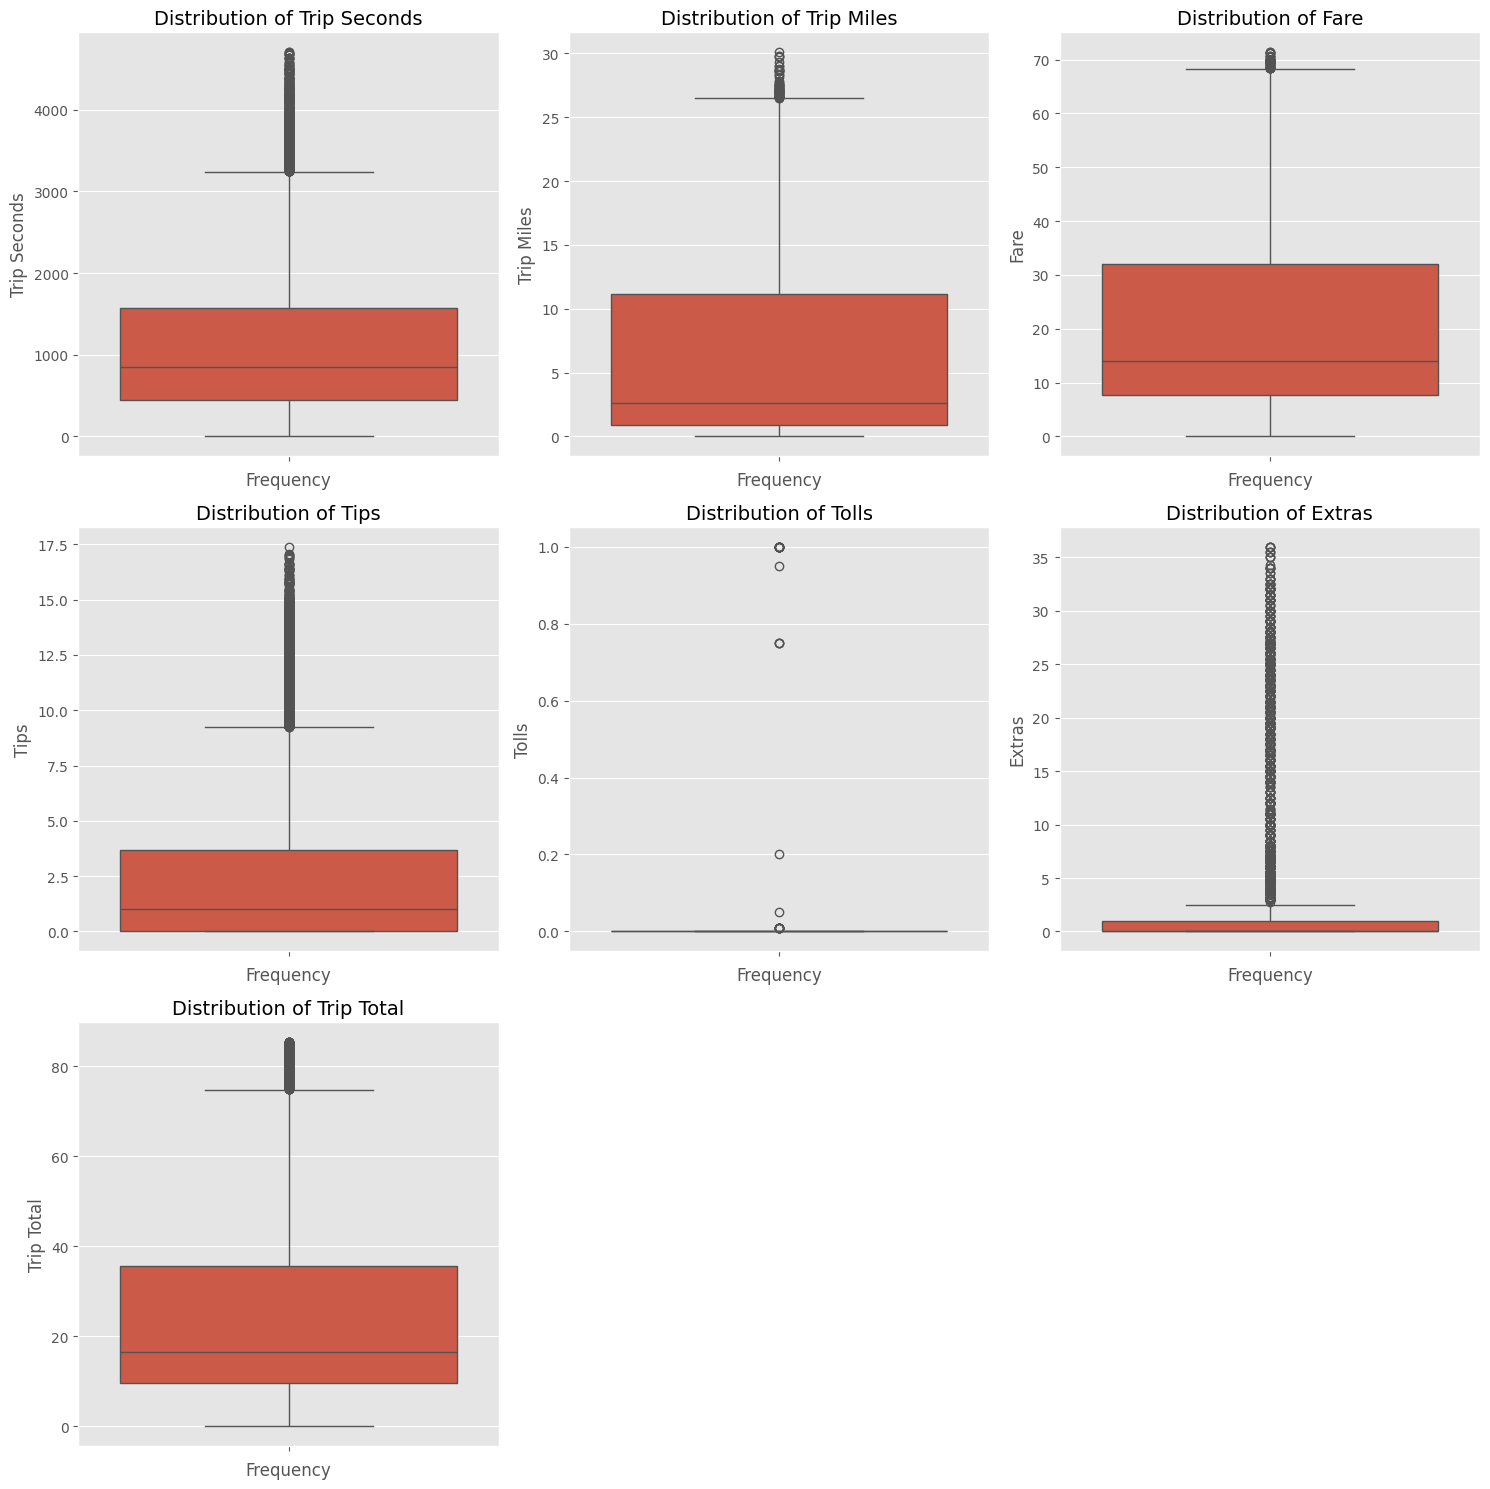

In [ ]:
numeric_columns = df.select_dtypes(np.number).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_xlabel('Frequency', fontsize=12)

for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

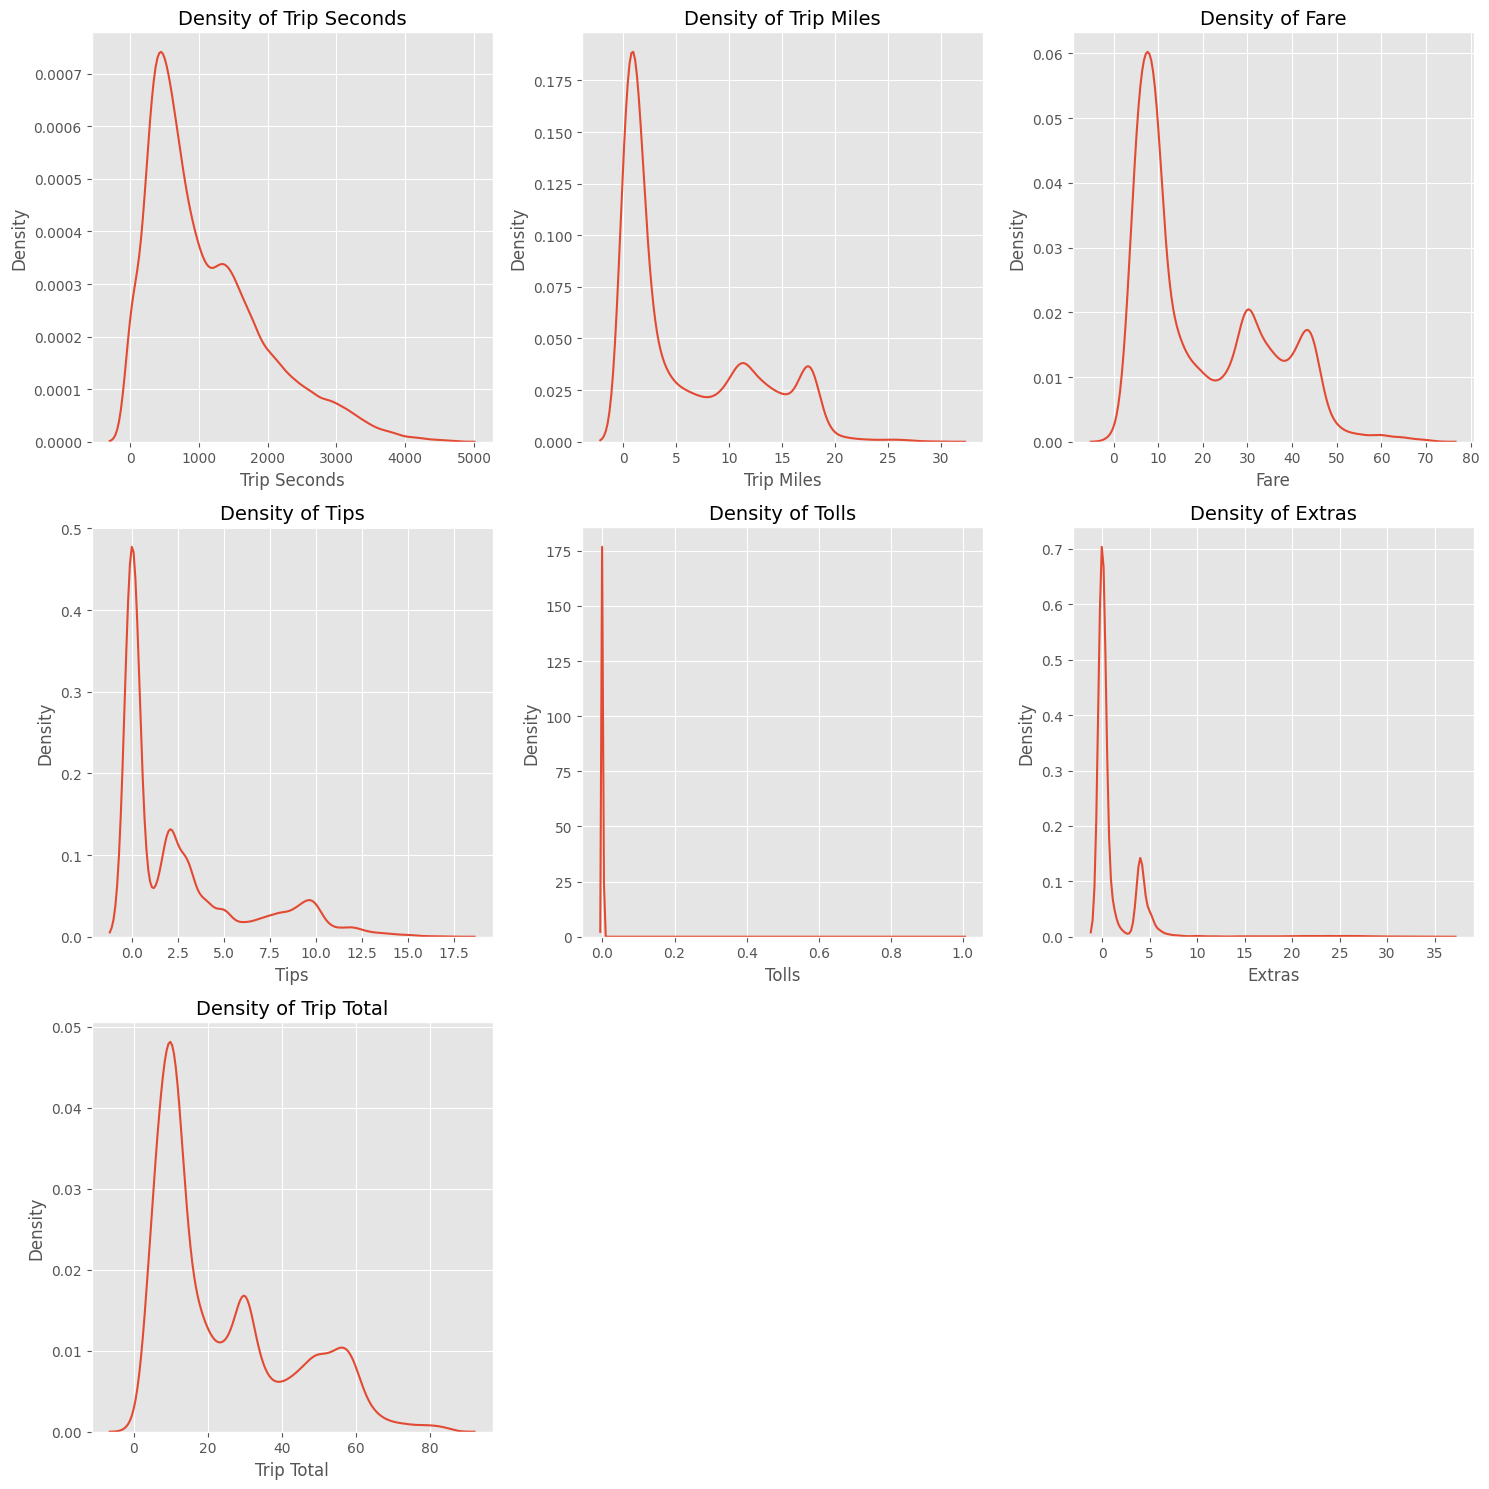

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Density of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df.reset_index(drop = True, inplace = True)
df.shape

(48252, 10)

In [ ]:
df.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Payment Type
0,2024-03-01,2024-03-01 00:00:00,15.0,0.09,3.25,0.00,0.0,35.0,38.75,Credit Card
1,2024-03-01,2024-03-01 00:15:00,900.0,3.00,12.00,0.00,0.0,0.0,12.00,Cash
2,2024-03-01,2024-03-01 00:00:00,711.0,5.84,16.75,4.45,0.0,5.0,26.70,Credit Card
3,2024-03-01,2024-03-01 00:30:00,1770.0,13.36,34.75,7.85,0.0,4.0,47.10,Credit Card
4,2024-03-01,2024-03-01 00:15:00,849.0,6.13,18.51,4.31,0.0,0.0,22.82,Mobile


In [ ]:
df['Payment Type'].nunique()

7

In [ ]:
df.drop(['Trip Start Timestamp', 'Trip End Timestamp'], axis = 1, inplace = True)
df.head()

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Payment Type
0,15.0,0.09,3.25,0.00,0.0,35.0,38.75,Credit Card
1,900.0,3.00,12.00,0.00,0.0,0.0,12.00,Cash
2,711.0,5.84,16.75,4.45,0.0,5.0,26.70,Credit Card
3,1770.0,13.36,34.75,7.85,0.0,4.0,47.10,Credit Card
4,849.0,6.13,18.51,4.31,0.0,0.0,22.82,Mobile


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Payment Type_Credit Card,Payment Type_Dispute,Payment Type_Mobile,Payment Type_No Charge,Payment Type_Prcard,Payment Type_Unknown
0,15.0,0.09,3.25,0.00,0.0,35.0,38.75,True,False,False,False,False,False
1,900.0,3.00,12.00,0.00,0.0,0.0,12.00,False,False,False,False,False,False
2,711.0,5.84,16.75,4.45,0.0,5.0,26.70,True,False,False,False,False,False
3,1770.0,13.36,34.75,7.85,0.0,4.0,47.10,True,False,False,False,False,False
4,849.0,6.13,18.51,4.31,0.0,0.0,22.82,False,False,True,False,False,False


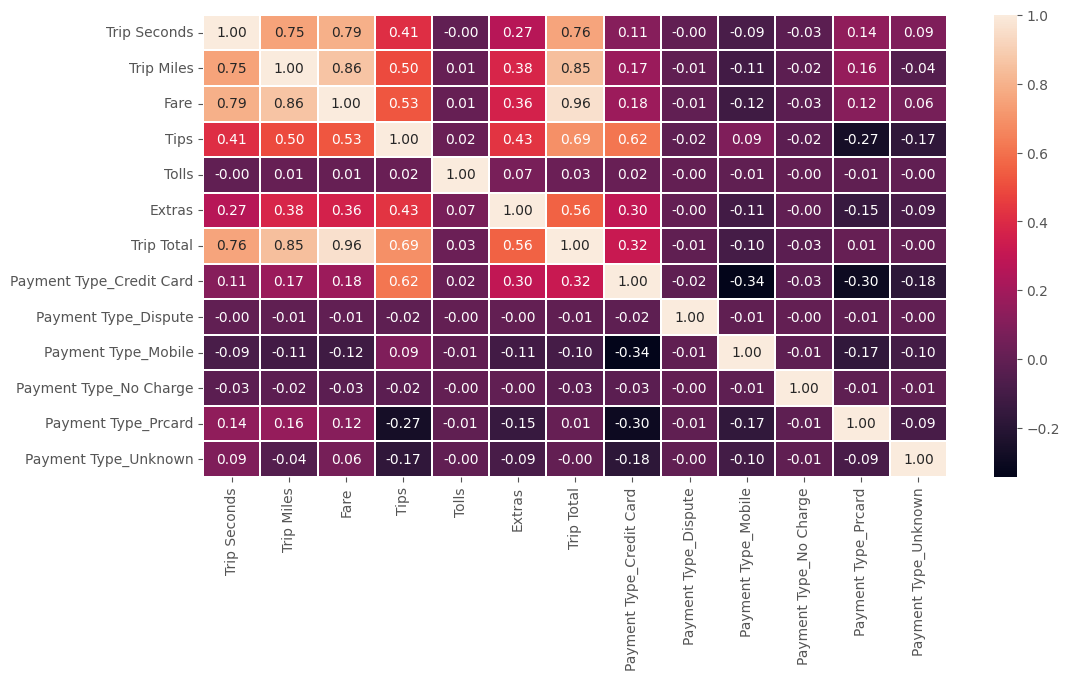

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', linewidths = 0.2);

In [ ]:
X = df.drop('Fare', axis = 1)
y = df['Fare']

X.head()

,Trip Seconds,Trip Miles,Tips,Tolls,Extras,Trip Total,Payment Type_Credit Card,Payment Type_Dispute,Payment Type_Mobile,Payment Type_No Charge,Payment Type_Prcard,Payment Type_Unknown
0,15.0,0.09,0.00,0.0,35.0,38.75,True,False,False,False,False,False
1,900.0,3.00,0.00,0.0,0.0,12.00,False,False,False,False,False,False
2,711.0,5.84,4.45,0.0,5.0,26.70,True,False,False,False,False,False
3,1770.0,13.36,7.85,0.0,4.0,47.10,True,False,False,False,False,False
4,849.0,6.13,4.31,0.0,0.0,22.82,False,False,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((33776, 12), (14476, 12))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
cols_to_scale = ['Trip Seconds', 'Trip Miles', 'Tips', 'Tolls', 'Extras', 'Trip Total']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
X_train.head()

,Trip Seconds,Trip Miles,Tips,Tolls,Extras,Trip Total,Payment Type_Credit Card,Payment Type_Dispute,Payment Type_Mobile,Payment Type_No Charge,Payment Type_Prcard,Payment Type_Unknown
3256,-0.637832,-0.704660,-0.486428,-0.01818,-0.401243,-0.805333,False,False,True,False,False,False
15423,0.887780,-0.911147,-0.729580,-0.01818,-0.401243,-0.216897,False,False,False,False,False,False
13270,1.872803,-0.719066,3.046431,-0.01818,0.756582,2.938527,True,False,False,False,False,False
7840,0.969865,0.551871,1.029698,-0.01818,0.756582,0.681954,True,False,False,False,False,False
14454,-0.941547,-0.863127,-0.157457,-0.01818,-0.401243,-0.918702,True,False,False,False,False,False


In [ ]:
X_test.head()

,Trip Seconds,Trip Miles,Tips,Tolls,Extras,Trip Total,Payment Type_Credit Card,Payment Type_Dispute,Payment Type_Mobile,Payment Type_No Charge,Payment Type_Prcard,Payment Type_Unknown
23468,-1.222982,-0.959167,-0.729580,-0.01818,0.756582,-0.918702,False,False,False,False,False,False
32676,-0.289556,-0.478964,0.443272,-0.01818,-0.401243,-0.502478,False,False,True,False,False,False
25516,-1.071711,-0.896741,-0.157457,-0.01818,-0.401243,-0.932198,True,False,False,False,False,False
23848,0.120870,-0.397330,-0.729580,-0.01818,-0.401243,-0.635281,False,False,False,False,False,False
29861,1.039051,1.276978,-0.729580,-0.01818,-0.401243,0.894115,False,False,False,False,False,False


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
numerical_cols = X_train.select_dtypes(np.number).columns
X_train_num = X_train[numerical_cols]

In [ ]:
def calculate_vif(data):
  """
  Calculate the Variance Inflation Factor (VIF) for each feature in a given dataset.

  Parameters:
  ----------
  data : pandas.DataFrame
    A DataFrame containing the numerical features for which VIF needs to be calculated.

  Returns:
  -------
  pandas.DataFrame
     A DataFrame with two columns:
    - 'Feature': The name of the feature.
    - 'VIF': The calculated VIF value for that feature.

  Notes:
  ------
  - High VIF values (commonly >5 or >10) indicate multicollinearity among features.
  - Ensure the input DataFrame `data` contains only numerical features, as VIF is not defined for categorical data.
  """

  vif_data = pd.DataFrame()
  vif_data['Feature'] = data.columns
  vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
  return vif_data

In [ ]:
vif = calculate_vif(X_train_num)
print("VIF")
print(vif)

VIF
        Feature       VIF
0  Trip Seconds  2.870560
1    Trip Miles  4.263046
2          Tips  2.117197
3         Tolls  1.004036
4        Extras  1.625327
5    Trip Total  8.221381


In [ ]:
X_train.drop('Trip Total', axis = 1, inplace = True)

numerical_cols_new = X_train.select_dtypes(np.number).columns
X_train_num_new = X_train[numerical_cols_new]

vif_new = calculate_vif(X_train_num_new)
print("VIF New")
print(vif_new)

VIF New
        Feature       VIF
0  Trip Seconds  2.333114
1    Trip Miles  2.654528
2          Tips  1.468836
3         Tolls  1.004033
4        Extras  1.287061


In [ ]:
X_train.head()

,Trip Seconds,Trip Miles,Tips,Tolls,Extras,Payment Type_Credit Card,Payment Type_Dispute,Payment Type_Mobile,Payment Type_No Charge,Payment Type_Prcard,Payment Type_Unknown
3256,-0.637832,-0.704660,-0.486428,-0.01818,-0.401243,False,False,True,False,False,False
15423,0.887780,-0.911147,-0.729580,-0.01818,-0.401243,False,False,False,False,False,False
13270,1.872803,-0.719066,3.046431,-0.01818,0.756582,True,False,False,False,False,False
7840,0.969865,0.551871,1.029698,-0.01818,0.756582,True,False,False,False,False,False
14454,-0.941547,-0.863127,-0.157457,-0.01818,-0.401243,True,False,False,False,False,False


In [ ]:
X_test = X_test[X_train.columns]
X_test.head()

,Trip Seconds,Trip Miles,Tips,Tolls,Extras,Payment Type_Credit Card,Payment Type_Dispute,Payment Type_Mobile,Payment Type_No Charge,Payment Type_Prcard,Payment Type_Unknown
23468,-1.222982,-0.959167,-0.729580,-0.01818,0.756582,False,False,False,False,False,False
32676,-0.289556,-0.478964,0.443272,-0.01818,-0.401243,False,False,True,False,False,False
25516,-1.071711,-0.896741,-0.157457,-0.01818,-0.401243,True,False,False,False,False,False
23848,0.120870,-0.397330,-0.729580,-0.01818,-0.401243,False,False,False,False,False,False
29861,1.039051,1.276978,-0.729580,-0.01818,-0.401243,False,False,False,False,False,False


In [ ]:
X_train.shape, X_test.shape

((33776, 11), (14476, 11))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def adjusted_r2(r2, n, p):
  """
  Calculates the adjusted R-squared value. The adjusted R-squared is a modified version of R-squared that accounts for the number of predictors in the
  model. It penalizes models with a large number of predictors, helping to prevent overfitting.

  Args:
    r2: The R-squared value.
    n: The number of data points.
    p: The number of predictors (independent variables).

  Returns:
    The adjusted R-squared value.
  """

  return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [ ]:
def build_evaluate_model(model, model_name, train_x, train_y, test_x, test_y):
  """
  Builds, trains, evaluates, and visualizes the performance of a machine learning model.

  Args:
      model: An sklearn machine learning model object.
      model_name: A string representing the name of the model.
      train_x: A pandas DataFrame containing the training features.
      train_y: A pandas Series containing the training target labels.
      test_x: A pandas DataFrame containing the testing features.
      test_y: A pandas Series containing the testing target labels.

  Returns:
      The trained machine learning model object.

  Prints:
      The training score of the model on the training data.
      The accuracy score of the model on the testing data.
      The classification report for the model on the testing data.
      A confusion matrix visualization for the model's performance on the testing data.
      A ROC curve visualization for the model's performance on the testing data.
  """
  model_ = model.fit(train_x, train_y)
  print(f"Training Score for {model_name}: {model_.score(train_x, train_y)}\n")

  pred = model_.predict(test_x)

  print(f"Mean Absolute Error for {model_name}: {mean_absolute_error(test_y, pred)}\n")

  print(f"Mean Squared Error for {model_name}: {mean_squared_error(test_y, pred)}\n")

  print(f"R-Squared Score for {model_name}: {r2_score(test_y, pred)}\n")

  r2 = r2_score(test_y, pred)
  n = test_x.shape[0]
  p = test_x.shape[1]

  r2_adj = adjusted_r2(r2, n, p)
  print(f"Adjusted R²: {r2_adj}")

  # Plot actual vs predicted values
  plt.figure(figsize=(10, 6))
  plt.scatter(test_y, pred, alpha=0.6, color='blue', label='Predicted vs Actual')
  plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red', linestyle='--', label='Perfect Prediction')
  plt.title('Actual vs Predicted Values')
  plt.xlabel('Actual Fares')
  plt.ylabel('Predicted Fares')
  plt.legend()
  plt.show()

  return model_

Training Score for Linear Regression: 0.8159077451688248

Mean Absolute Error for Linear Regression: 3.6594690417663474

Mean Squared Error for Linear Regression: 44.006605123688765

R-Squared Score for Linear Regression: 0.7973423992045813

Adjusted R²: 0.7971882763057463


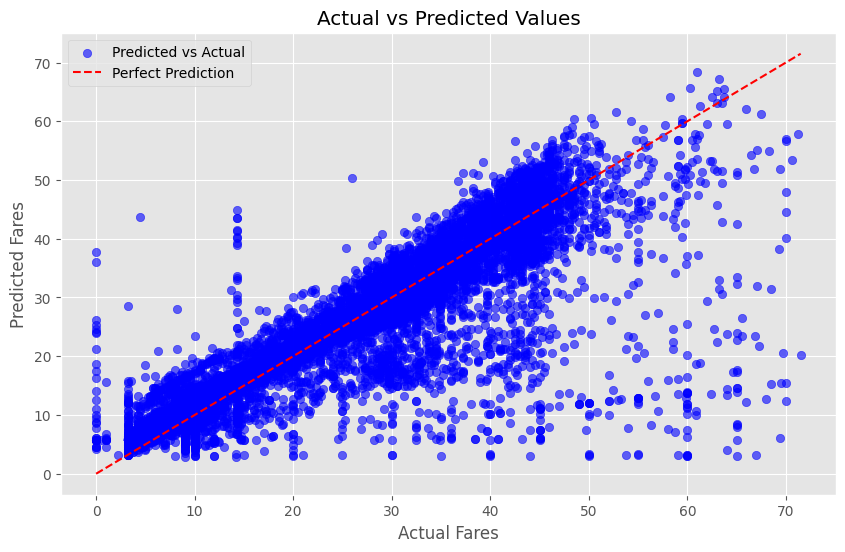

In [ ]:
lr_model = build_evaluate_model(model = LinearRegression(), model_name = 'Linear Regression', train_x = X_train, train_y = y_train,
                                test_x = X_test, test_y = y_test)

In [ ]:
feature_contributions = pd.DataFrame({
    'features': X_train.columns,
    'co-efficient': lr_model.coef_
})

feature_contributions

,features,co-efficient
0,Trip Seconds,4.277952
1,Trip Miles,7.914996
2,Tips,3.077369
3,Tolls,-0.016792
4,Extras,0.304799
5,Payment Type_Credit Card,-2.700198
6,Payment Type_Dispute,6.268796
7,Payment Type_Mobile,-2.903398
8,Payment Type_No Charge,-1.546644
9,Payment Type_Prcard,0.843001


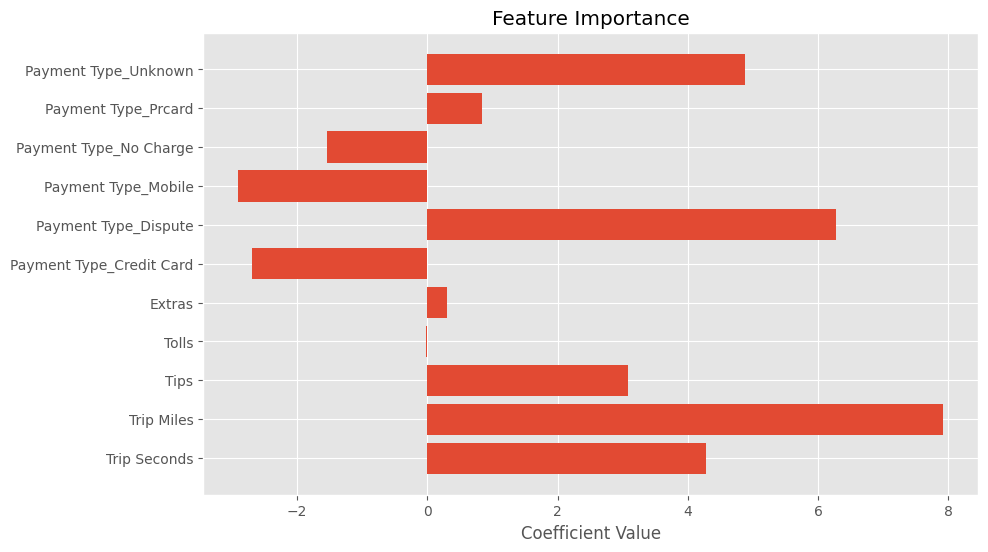

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_contributions['features'], feature_contributions['co-efficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(
  monitor='val_loss',   # Monitor validation loss
  patience=50,          # Number of epochs to wait for improvement
  restore_best_weights=True,  # Revert to the best weights after stopping
  verbose=1             # Print messages during early stopping
)

In [ ]:
# Define custom R² metric for Model Compilation

def r_squared_score(y_true, y_pred):
  """
  This function calculates the R-squared score, a metric that represents the proportion of variance in the dependent variable that's explained by the
  independent variables in the model. R-squared values range from 0 to 1, with higher values indicating better model fit.

  The implementation uses TensorFlow's Keras backend (K) for efficient tensor operations and includes a small epsilon value to ensure numerical stability.

  Args:
    y_true: The ground truth labels.
    y_pred: The predicted labels.

  Returns:
    The R-squared score.
  """
  ss_res = K.sum(K.square(y_true - y_pred))  # Residual sum of squares
  ss_tot = K.sum(K.square(y_true - K.mean(y_true)))  # Total sum of squares
  return 1 - ss_res / (ss_tot + K.epsilon())  # R² formula with numerical stability

In [ ]:
class LinearRegressionModel(tf.keras.Model):
  """
  A simple linear regression model implemented using TensorFlow Keras. This class represents a linear regression model where the output is a linear
  combinationof the input features. The `call` method defines the forward pass of the model, applying the `dense` layer to the input and returning the
  predicted output.

  Args:
    input_dim: The number of input features.

  Attributes:
    dense: A Dense layer with one output neuron and L2 regularization.

  Methods:
    call(inputs): Performs the forward pass of the model.
  """

  def __init__(self, input_dim, regularizations = None):
    super(LinearRegressionModel, self).__init__()
    self.dense = tf.keras.layers.Dense(1, activation = None, kernel_regularizer = regularizations)

  def call(self, inputs):
    return self.dense(inputs)

In [ ]:
def train_and_evaluate_model(input_dim, learning_rate, epochs, train_x, train_y, test_x, test_y, regularizations = None):
  """
  Trains and evaluates a linear regression model using TensorFlow Keras. This function trains a linear regression model using the provided data and
  hyperparameters. It performs the following steps:

  1. Creates a LinearRegressionModel instance with the specified input dimension.
  2. Compiles the model with Adam optimizer, mean squared error (mse) loss, and r-squared metric.
  3. Trains the model on the training data with early stopping to prevent overfitting.
  4. Plots the training and validation loss curves to visualize the learning process.
  5. Returns the trained model.

  Args:
    input_dim: The number of input features.
    learning_rate: The learning rate for the optimizer.
    epochs: The number of training epochs.
    train_x: The training data features (NumPy array).
    train_y: The training data labels (NumPy array).
    test_x: The testing data features (NumPy array).
    test_y: The testing data labels (NumPy array).

  Returns:
    The trained linear regression model (LinearRegressionModel instance).
  """
  model = LinearRegressionModel(input_dim = input_dim, regularizations = regularizations)

  model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = 'mse',
    metrics = [r_squared_score]
  )

  # Train the model
  history = model.fit(train_x, train_y, epochs=epochs, validation_data=(test_x, test_y), callbacks=[early_stopping])
  # Plot training and validation loss
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()
  plt.show()

  return model

Epoch 1/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 597.2393 - r_squared_score: -1.8751 - val_loss: 505.8445 - val_r_squared_score: -1.4336
Epoch 2/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 471.1898 - r_squared_score: -1.2876 - val_loss: 404.8043 - val_r_squared_score: -0.9480
Epoch 3/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 378.7736 - r_squared_score: -0.8330 - val_loss: 324.9457 - val_r_squared_score: -0.5637
Epoch 4/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 304.5996 - r_squared_score: -0.4855 - val_loss: 262.0536 - val_r_squared_score: -0.2604
Epoch 5/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 245.7128 - r_squared_score: -0.1913 - val_loss: 212.5550 - val_r_squared_score: -0.0208
Epoch 6/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 201.0849 - r_squared_score: 0.0245 - val_loss: 173.3320 - val_r_squared_score: 0.1699
Epoch 7/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 160.4068 - r_squared_score: 0.215

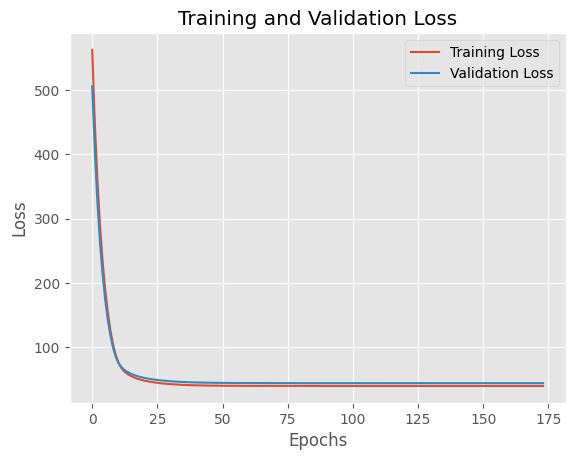

In [ ]:
model_base = train_and_evaluate_model(input_dim = X_train.shape[1], learning_rate = 0.001, epochs = 300,
                                      train_x = X_train, train_y = y_train, test_x = X_test, test_y = y_test)

Epoch 1/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 599.5410 - r_squared_score: -1.9023 - val_loss: 512.2727 - val_r_squared_score: -1.4648
Epoch 2/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 481.7977 - r_squared_score: -1.3316 - val_loss: 410.7422 - val_r_squared_score: -0.9767
Epoch 3/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 394.1231 - r_squared_score: -0.8701 - val_loss: 330.3548 - val_r_squared_score: -0.5897
Epoch 4/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 307.8471 - r_squared_score: -0.5004 - val_loss: 266.3925 - val_r_squared_score: -0.2811
Epoch 5/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 247.6289 - r_squared_score: -0.1964 - val_loss: 215.8609 - val_r_squared_score: -0.0364
Epoch 6/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 202.6499 - r_squared_score: 0.0267 - val_loss: 175.5923 - val_r_squared_score: 0.1595
Epoch 7/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 165.0494 - r_squared_score: 0.211

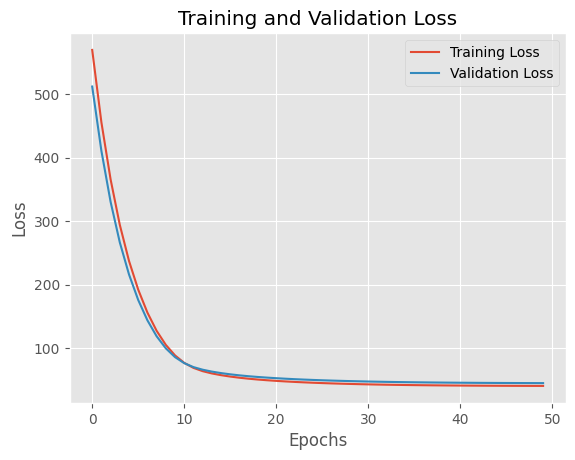

In [ ]:
model_reg = train_and_evaluate_model(input_dim = X_train.shape[1], learning_rate = 0.001, epochs = 300,
                                    train_x = X_train, train_y = y_train, test_x = X_test, test_y = y_test,
                                    regularizations = tf.keras.regularizers.l2(0.0005))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_transformation(train_x, test_x, interaction = False):
  poly = PolynomialFeatures(degree=2, interaction_only=interaction, include_bias=False)
  transformed_train = poly.fit_transform(train_x)
  transformed_test = poly.transform(test_x)
  return transformed_train, transformed_test, poly

In [ ]:
X_train_poly, X_test_poly, poly = polynomial_transformation(train_x = X_train, test_x = X_test)
X_train_poly.shape, X_test_poly.shape

((33776, 77), (14476, 77))

In [ ]:
X_train_poly

array([[-0.63783211, -0.70465987, -0.48642803, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88778009, -0.91114715, -0.7295803 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.87280258, -0.71906596,  3.04643145, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.22298237, -0.95916745, -0.7295803 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.73398907, -0.74627746, -0.45782188, ...,  0.        ,
         0.        ,  0.        ],
       [-0.906368  , -0.82150926,  0.12860419, ...,  0.        ,
         0.        ,  0.        ]])

Training Score for Linear Regression: 0.8759790528890824

Mean Absolute Error for Linear Regression: 2.567265084876279

Mean Squared Error for Linear Regression: 29.190202835453313

R-Squared Score for Linear Regression: 0.8655743505608384

Adjusted R²: 0.864855446893189


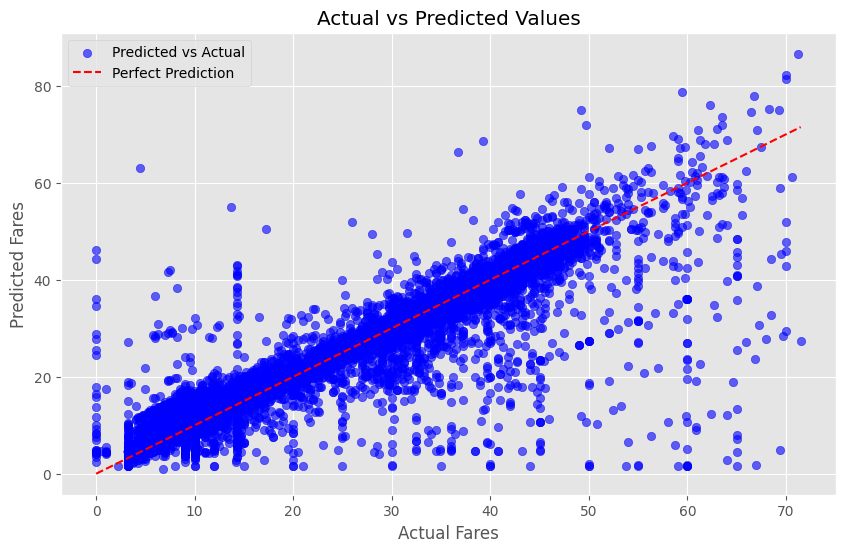

In [ ]:
lr_model_poly = build_evaluate_model(model = LinearRegression(), model_name = 'Linear Regression', train_x = X_train_poly, train_y = y_train,
                                     test_x = X_test_poly, test_y = y_test)

Epoch 1/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 676.9575 - r_squared_score: -2.3268 - val_loss: 367.1132 - val_r_squared_score: -0.7913
Epoch 2/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 293.0681 - r_squared_score: -0.4280 - val_loss: 194.0500 - val_r_squared_score: 0.0578
Epoch 3/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 180.3615 - r_squared_score: 0.1477 - val_loss: 123.7045 - val_r_squared_score: 0.4051
Epoch 4/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 113.8366 - r_squared_score: 0.4488 - val_loss: 90.9986 - val_r_squared_score: 0.5659
Epoch 5/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 87.1674 - r_squared_score: 0.5814 - val_loss: 73.0454 - val_r_squared_score: 0.6532
Epoch 6/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 71.1992 - r_squared_score: 0.6649 - val_loss: 61.5983 - val_r_squared_score: 0.7084
Epoch 7/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 59.6721 - r_squared_score: 0.7104 - val_loss:

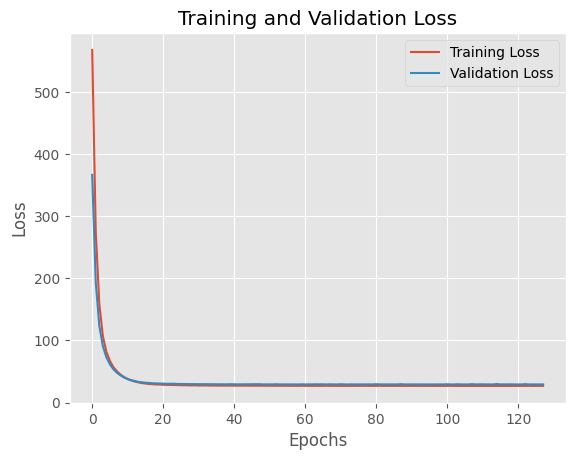

In [ ]:
model_poly = train_and_evaluate_model(input_dim = X_train_poly.shape[1], learning_rate = 0.001, epochs = 300,
                                      train_x = X_train_poly, train_y = y_train, test_x = X_test_poly, test_y = y_test)

In [ ]:
X_train_poly_reg, X_test_poly_reg, poly_reg = polynomial_transformation(train_x = X_train, test_x = X_test)

Epoch 1/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 533.0138 - r_squared_score: -1.5509 - val_loss: 280.8950 - val_r_squared_score: -0.3609
Epoch 2/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 245.0237 - r_squared_score: -0.1861 - val_loss: 172.5767 - val_r_squared_score: 0.1658
Epoch 3/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 158.4963 - r_squared_score: 0.2347 - val_loss: 121.6514 - val_r_squared_score: 0.4159
Epoch 4/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 114.1473 - r_squared_score: 0.4484 - val_loss: 91.0611 - val_r_squared_score: 0.5658
Epoch 5/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 84.6889 - r_squared_score: 0.5959 - val_loss: 72.6896 - val_r_squared_score: 0.6553
Epoch 6/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 67.7781 - r_squared_score: 0.6731 - val_loss: 60.8960 - val_r_squared_score: 0.7124
Epoch 7/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 57.3719 - r_squared_score: 0.7262 - val_loss:

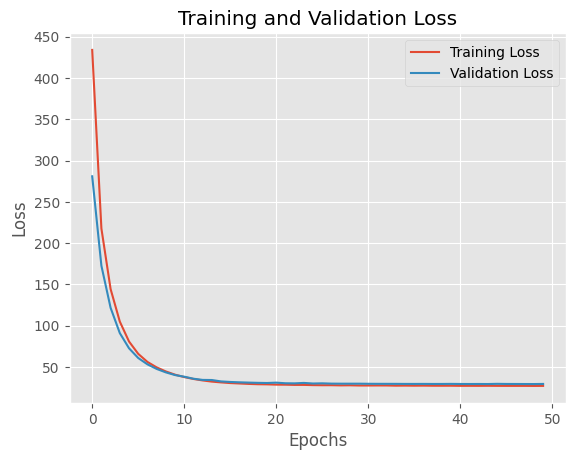

In [ ]:
model_poly_reg = train_and_evaluate_model(input_dim = X_train_poly_reg.shape[1], learning_rate = 0.001, epochs = 300,
                                          train_x = X_train_poly_reg, train_y = y_train, test_x = X_test_poly_reg, test_y = y_test,
                                          regularizations = tf.keras.regularizers.l2(0.0005))

In [ ]:
X_train_poly_inter, X_test_poly_inter, poly_inter = polynomial_transformation(train_x = X_train, test_x = X_test, interaction = True)
X_train_poly_inter.shape, X_test_poly_inter.shape

((33776, 66), (14476, 66))

Training Score for Linear Regression: 0.8523712413060898

Mean Absolute Error for Linear Regression: 3.102336425383854

Mean Squared Error for Linear Regression: 34.88241856609578

R-Squared Score for Linear Regression: 0.8393607678511606

Adjusted R²: 0.8386249645808558


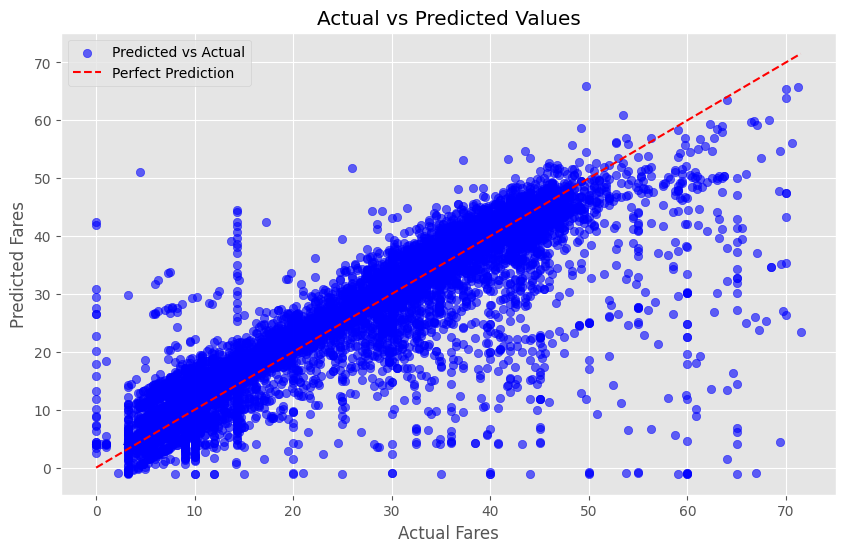

In [ ]:
lr_model_poly_inter = build_evaluate_model(model = LinearRegression(), model_name = 'Linear Regression', train_x = X_train_poly_inter, train_y = y_train,
                                          test_x = X_test_poly_inter, test_y = y_test)

Epoch 1/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 552.3237 - r_squared_score: -1.6816 - val_loss: 375.4774 - val_r_squared_score: -0.8119
Epoch 2/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 337.5899 - r_squared_score: -0.6301 - val_loss: 262.8875 - val_r_squared_score: -0.2674
Epoch 3/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 241.3239 - r_squared_score: -0.1772 - val_loss: 201.6043 - val_r_squared_score: 0.0330
Epoch 4/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 188.2861 - r_squared_score: 0.0972 - val_loss: 157.9552 - val_r_squared_score: 0.2475
Epoch 5/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 146.6150 - r_squared_score: 0.2938 - val_loss: 126.2713 - val_r_squared_score: 0.4027
Epoch 6/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 115.8616 - r_squared_score: 0.4438 - val_loss: 104.1230 - val_r_squared_score: 0.5105
Epoch 7/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 93.9377 - r_squared_score: 0.5470 - va

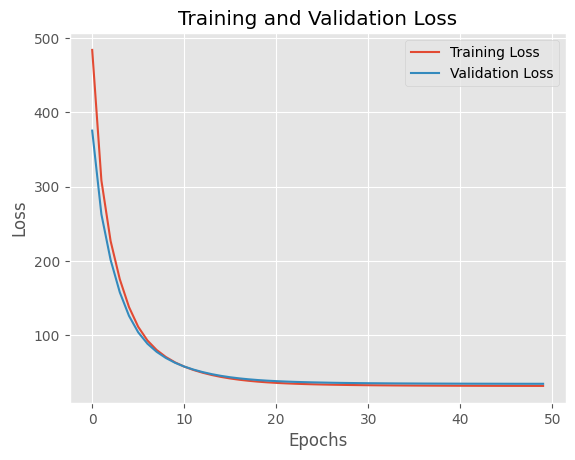

In [ ]:
model_poly_inter = train_and_evaluate_model(input_dim = X_train_poly_inter.shape[1], learning_rate = 0.001, epochs = 300,
                                            train_x = X_train_poly_inter, train_y = y_train, test_x = X_test_poly_inter, test_y = y_test)

In [ ]:
X_train_poly_inter_reg, X_test_poly_inter_reg, poly_inter_reg = polynomial_transformation(train_x = X_train, test_x = X_test, interaction = True)

Epoch 1/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 562.5582 - r_squared_score: -1.7559 - val_loss: 387.9038 - val_r_squared_score: -0.8735
Epoch 2/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 352.8197 - r_squared_score: -0.7068 - val_loss: 273.4022 - val_r_squared_score: -0.3196
Epoch 3/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 256.9759 - r_squared_score: -0.2390 - val_loss: 209.8542 - val_r_squared_score: -0.0079
Epoch 4/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 196.0268 - r_squared_score: 0.0527 - val_loss: 164.0201 - val_r_squared_score: 0.2176
Epoch 5/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 152.8690 - r_squared_score: 0.2696 - val_loss: 130.4160 - val_r_squared_score: 0.3825
Epoch 6/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 123.6214 - r_squared_score: 0.4123 - val_loss: 106.8341 - val_r_squared_score: 0.4977
Epoch 7/300
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 99.2184 - r_squared_score: 0.5308 - v

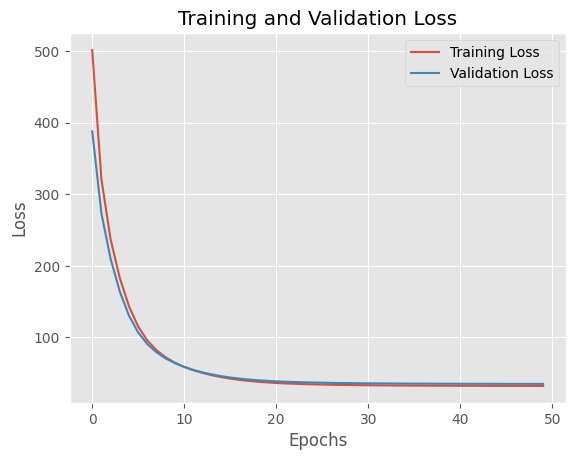

In [ ]:
model_poly_inter_reg = train_and_evaluate_model(input_dim = X_train_poly_inter_reg.shape[1], learning_rate = 0.001, epochs = 300,
                                                train_x = X_train_poly_inter_reg, train_y = y_train, test_x = X_test_poly_inter_reg, test_y = y_test,
                                                regularizations = tf.keras.regularizers.l2(0.0005))

In [ ]:
pred_poly = model_poly.predict(X_test_poly)

453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mean_squared_error(y_test, pred_poly)

29.146015380138873

In [ ]:
r2 = r2_score(y_test, pred_poly)
print(f"R^2 Score for Polynomial Features: {r2}")

R^2 Score for Polynomial Features: 0.8657778410062865


In [ ]:
X_test_poly.shape[0], X_test_poly.shape[1]

(14476, 77)

In [ ]:
n = X_test_poly.shape[0]    # Number of samples
p = X_test_poly.shape[1]      # Number of predictors

r2_adj = adjusted_r2(r2, n, p)
print(f"Adjusted R²: {r2_adj}")

Adjusted R²: 0.8650600255984162


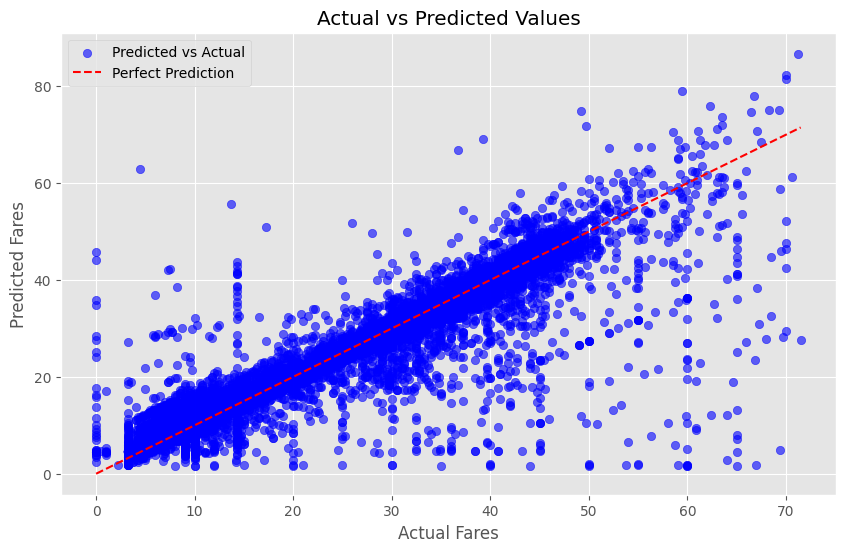

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred_poly, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Fares')
plt.ylabel('Predicted Fares')
plt.legend()
plt.show()

In [ ]:
poly_feature_names = poly.get_feature_names_out(X_train.columns)
print(poly_feature_names)

['Trip Seconds' 'Trip Miles' 'Tips' 'Tolls' 'Extras'
 'Payment Type_Credit Card' 'Payment Type_Dispute' 'Payment Type_Mobile'
 'Payment Type_No Charge' 'Payment Type_Prcard' 'Payment Type_Unknown'
 'Trip Seconds^2' 'Trip Seconds Trip Miles' 'Trip Seconds Tips'
 'Trip Seconds Tolls' 'Trip Seconds Extras'
 'Trip Seconds Payment Type_Credit Card'
 'Trip Seconds Payment Type_Dispute' 'Trip Seconds Payment Type_Mobile'
 'Trip Seconds Payment Type_No Charge' 'Trip Seconds Payment Type_Prcard'
 'Trip Seconds Payment Type_Unknown' 'Trip Miles^2' 'Trip Miles Tips'
 'Trip Miles Tolls' 'Trip Miles Extras'
 'Trip Miles Payment Type_Credit Card' 'Trip Miles Payment Type_Dispute'
 'Trip Miles Payment Type_Mobile' 'Trip Miles Payment Type_No Charge'
 'Trip Miles Payment Type_Prcard' 'Trip Miles Payment Type_Unknown'
 'Tips^2' 'Tips Tolls' 'Tips Extras' 'Tips Payment Type_Credit Card'
 'Tips Payment Type_Dispute' 'Tips Payment Type_Mobile'
 'Tips Payment Type_No Charge' 'Tips Payment Type_Prcard'
 'Ti

Intercept (Bias): 13.9939


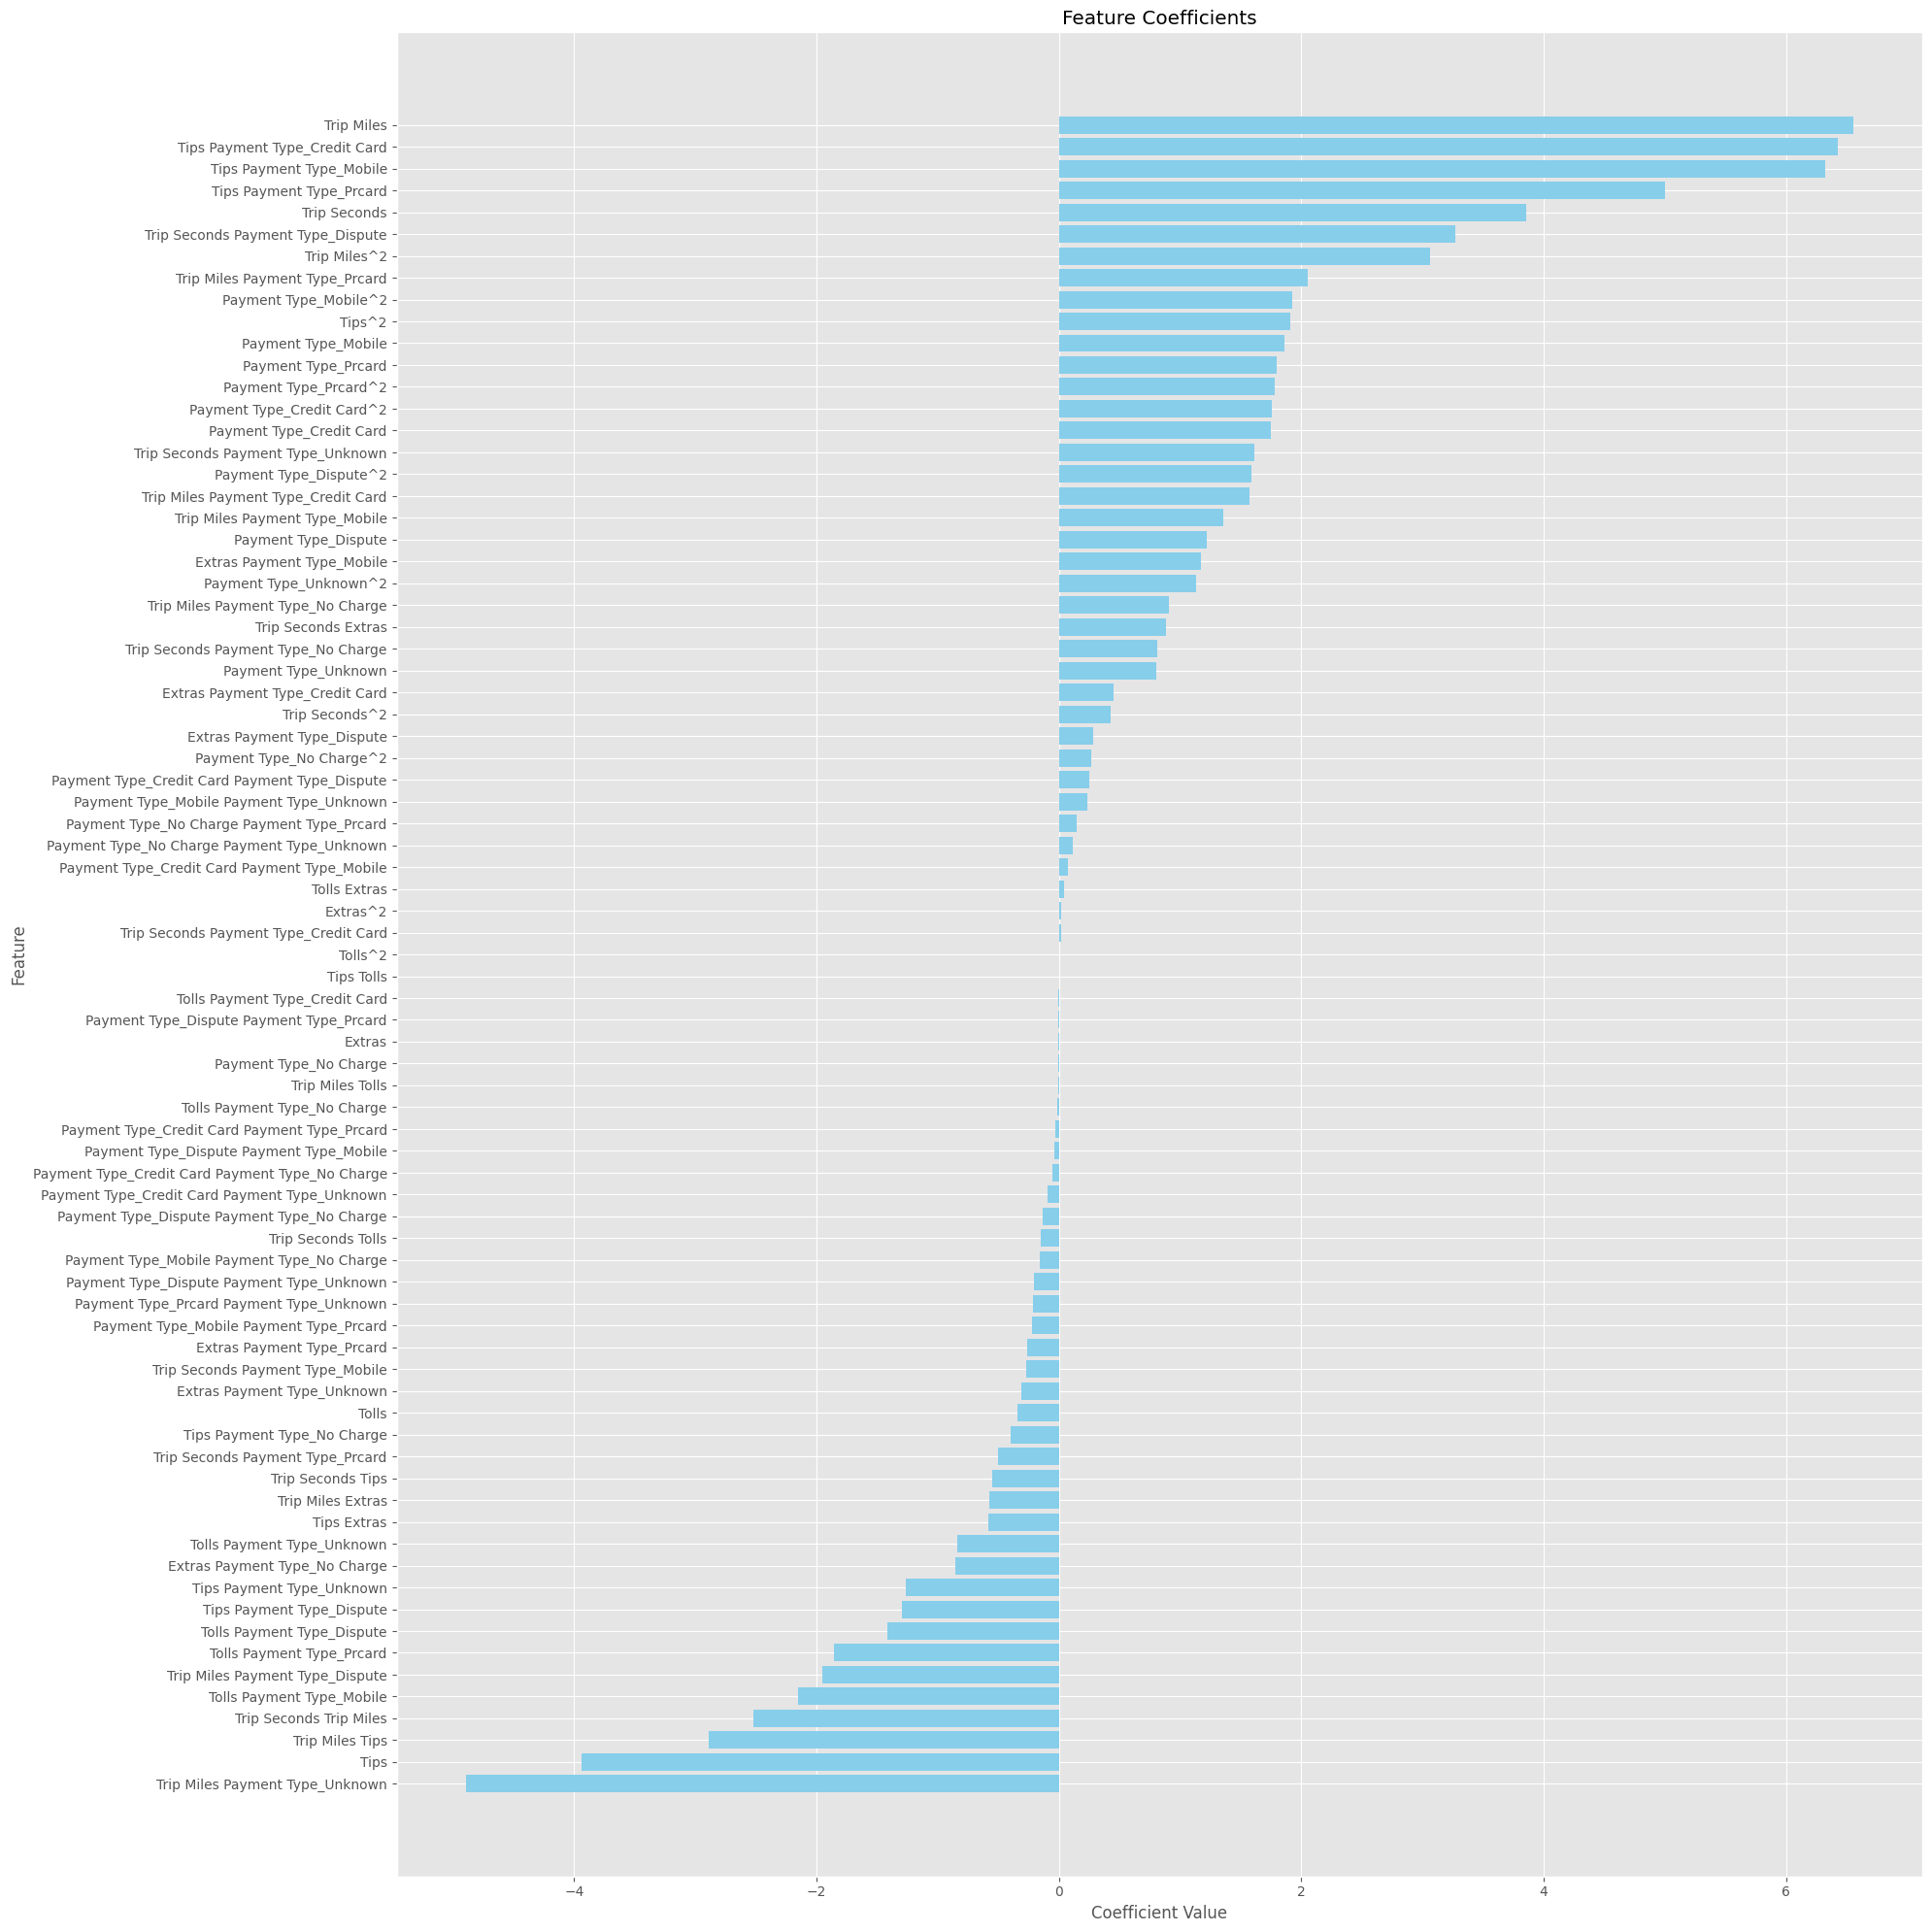

In [ ]:
# Get the weights and bias
weights, bias = model_poly.layers[0].get_weights()

# Print the intercept (bias)
print(f"Intercept (Bias): {bias[0]:.4f}")

# Flatten weights for easier processing
coefficients = weights.flatten()

# Create a dictionary of features and coefficients
coef_dict = {feature: coef for feature, coef in zip(poly_feature_names, coefficients)}

# Sort the coefficients for better visualization
sorted_coef = dict(sorted(coef_dict.items(), key=lambda item: item[1]))

# Plot the coefficients as a horizontal bar chart
plt.figure(figsize=(20, 20))
plt.barh(list(sorted_coef.keys()), list(sorted_coef.values()), color='skyblue')
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.tight_layout()
plt.show()